# Loading and Renaming the Columns

In [ ]:
import pandas as pd


covid_dataset = pd.read_csv("covid_19_clean_complete.csv")


covid_dataset = covid_dataset.rename(columns={
    "Date": "Date",
    "Country/Region": "Country",
    "Confirmed": "Confirmed",
    "Recovered": "Recovered",
    "Deaths": "Deaths"
})

covid_dataset.head()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


# Cleaning  the Data

In [ ]:
covid_dataset.isnull().sum()



,0
Province/State,11559
Country,0
Lat,0
Long,0
Date,0
Confirmed,0
Deaths,0
Recovered,0
Active,0
WHO Region,0


In [ ]:
covid_dataset.duplicated().sum()


np.int64(0)

In [ ]:
covid_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16515 entries, 0 to 16514
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  4956 non-null   object 
 1   Country         16515 non-null  object 
 2   Lat             16515 non-null  float64
 3   Long            16515 non-null  float64
 4   Date            16515 non-null  object 
 5   Confirmed       16515 non-null  int64  
 6   Deaths          16515 non-null  int64  
 7   Recovered       16515 non-null  int64  
 8   Active          16515 non-null  int64  
 9   WHO Region      16515 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.3+ MB


# Basic EDA

In [ ]:
covid_dataset.head()


,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
covid_dataset.describe()


,Lat,Long,Confirmed,Deaths,Recovered,Active
count,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000,16515.000000
mean,21.436999,23.626376,370.631547,13.472782,127.172147,229.986618
std,24.961996,70.513851,3775.142869,183.742745,2049.400594,2258.471128
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,-6.000000
25%,7.873054,-15.310100,0.000000,0.000000,0.000000,0.000000
50%,23.634500,21.745300,0.000000,0.000000,0.000000,0.000000
75%,41.204380,84.250000,12.500000,0.000000,0.000000,7.000000
max,71.706900,178.065000,69176.000000,6820.000000,60811.000000,54030.000000


In [ ]:
covid_dataset["Country"].nunique()


187

In [ ]:
covid_dataset.groupby("Country")["Confirmed"].max().sort_values(ascending=False).head(10)


,Confirmed
Country,
Italy,69176
China,67801
US,54112
Spain,39885
Germany,32986
Iran,24811
France,22304
United Kingdom,15039
Switzerland,9877


# Visualizations

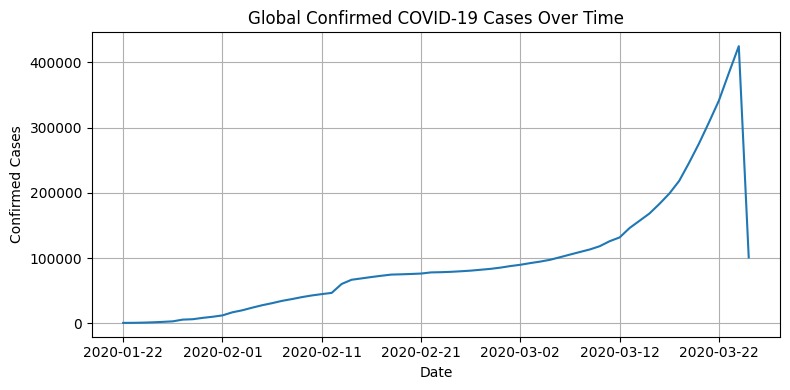

In [ ]:
import matplotlib.pyplot as plt

confirmed_by_date = covid_dataset.groupby("Date")["Confirmed"].sum()

plt.figure(figsize=(8,4))
confirmed_by_date.plot()
plt.title("Global Confirmed COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()


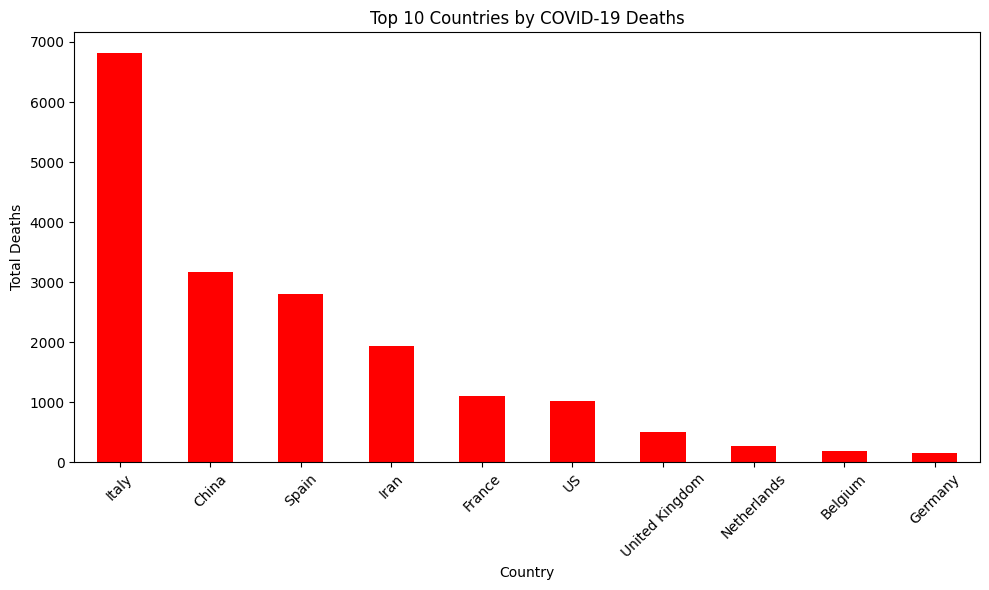

In [ ]:
top_deaths = covid_dataset.groupby("Country")["Deaths"].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_deaths.plot(kind='bar', color='red')
plt.title("Top 10 Countries by COVID-19 Deaths")
plt.xlabel("Country")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


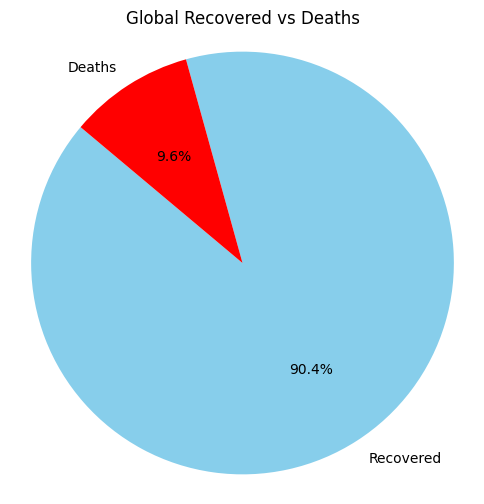

In [ ]:
total_recovered = covid_dataset["Recovered"].sum()
total_deaths = covid_dataset["Deaths"].sum()

labels = ["Recovered", "Deaths"]
sizes = [total_recovered, total_deaths]
colors = ["skyblue", "red"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Global Recovered vs Deaths")
plt.axis("equal")
plt.show()


# Insights

My Key Observations:

1.Over time, confirmed cases showed a steady and sometimes sharp rise, especially during major waves.

2.The United States consistently topped the list in terms of total confirmed cases and deaths.

3.Countries like Italy, Spain, and the UK showed early spikes in death rates during the first wave.

4.Recovery counts are significantly higher than deaths in most countries, which suggests that many people were able to recover with timely treatment.

5.Some countries reported sudden jumps in data — possibly due to delayed or bulk reporting of cases.

6.The total number of countries in the dataset is around 187, showing wide international tracking.

7.A few countries had low reported cases — which could either mean effective containment or limited testing/reporting.

8.The line chart clearly visualizes how the pandemic escalated globally over time.

9.The bar chart shows a strong concentration of deaths in only a few countries — possibly due to high population or delayed lockdowns.

10.Visualizing recovery vs death helped me understand the overall global situation more clearly than numbers alone.

